<a href="https://colab.research.google.com/github/Machocho254/HYpothyrodism-Prediction/blob/master/Hypothyrodism_Week8_IP_MS_CORE_JANUARY_2020_MACHOCHO_MENGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAIROBI HOSPITAL HYPOTHYRODISM CLINICAL CAMP**

# **BUSINESS UNDERSTANDING**

a) **DEFINITION OF THE QUESTION**

The Nairobi Hospital conducted a clinic camp to test for hypothyrodism. As a data scientist I have been tasked with creating a model that will determine whether or not the patient's symptoms indicate that the patient has hypothyroidism from the provided data. 

**WHAT IS HYPOTHYRODISM**

Hypothyrodism is a condition where the body produces too little thyroxine. Low thyroxine levels cause problems with development if it occurs when an individual is young. In adults, thyroxine deficiency will lower the metabolic rate, causing weight gain, memory problems, infertility, fatigue, and muscle stiffness.



**Thyroxine**: is a hormone secreted in the thyroid glands into the bloodstream. It plays a crucial role in heart and digestive function, metabolism, brain development, bone health, and muscle control. It affects almost all of the body's systems, which means proper thyroxine levels are vital for health.

b) **DEFINITION OF THE METRIC OF SUCCESS**

> This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism.

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible

c) **UNDERSTANDING THE CONTEXT**

> Factors that affect Hypothyrodism include: 

Being a woman

Are older than 60

Have a family history of thyroid disease

Have an autoimmune disease, such as type 1 diabetes or celiac disease

Have been treated with radioactive iodine or anti-thyroid medications

Received radiation to your neck or upper chest

Have had thyroid surgery (partial thyroidectomy)

Have been pregnant or delivered a baby within the past six months

d) **Experimental Design**

The project was undertaken using the following design Datasets(hypothyroid.csv)

The experimental design is as follows: 

Exploratory Data Analysis

Data Cleaning

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Modelling

Decision Trees: Random Forests , Ada Boosted Trees , Gradient Boosted Trees

Support Vector Machines: Kernel = polynomial , linear , rbf

Conclusion

d) **DATA RELEVANCE**

The relavance of our data will be answered by the following questions.

How accurate is the data at predicting whether a patient has hypothyroidism or not?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

# **DATA UNDERSTANDING**

## **Data Reading**

Loading the data onto the notebook using pandas

In [0]:
# importing the needed libraries
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# loading the data onto the notebook
# 
thyroid = pd.read_csv('/content/hypothyroid.csv')


In [3]:
# previewing the first observations of the dataset
# 
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
# previewing the last observations of the dataset
# 
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
# to get the number of rows and columns in the dataset
# 
thyroid.shape

# the data has 26 columns and 3163 rows

(3163, 26)

In [6]:
# to get the information about the data

thyroid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

There are variables that should be intergers. The datatypes will be changed to intergers for the exploratory data analysis. 

In [7]:
# to check whether the data has any missiing values
# 
thyroid.isnull().sum()

# the data does not have any missing values 

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [8]:
# data description 
# 
thyroid.describe().T

# from the output, it is evident that the data has some missing data as there are instances where the entry is ?
# we have to find a way to identify the entries with ? and see whether we drop them or using the fill

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [9]:
# to check for duplicates in the data
# 
thyroid.duplicated().any()

True

In [45]:
# Remove duplicates
# Keep every first data point of the duplicated datapoints
#
thyroid.drop_duplicates(keep='first', inplace = True)

# Check to confirm whether duplicates have been dropped
#
thyroid.duplicated().any()

False

##### **UNIQUE VALUES**

In [46]:
# checking for the unique values of the dataframe
# using a for loop  to print unique values for each column
#
for column in thyroid.columns:
  print(column)
  print(thyroid[column].nunique())
  print(thyroid[column].unique())
  print('\n')

status
2
['hypothyroid' 'negative']


age
93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex
3
['M' 'F' '?']


on_thyroxine
2
['f' 't']


query_on_thyroxine
2
['f' 't']


on_antithyroid_medication
2
['f' 't']


thyroid_surgery
2
['f' 't']


query_hypothyroid
2
['f' 't']


query_hyperthyroid
2
['f' 't']


pregnant
2
['f' 't']


sick
2
['f' 't']


tumor
2
['f' 't']


lithium
2
['f' 't']


goitre
2
['f' 't']


TSH_measured
2
['y' 'n']


TSH
240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34

### **External Data Validation**

The data is valid. The clinical camp tested for the correct factors to diagnose hypothyroid.  

# 3.0 **DATA PREPARATION**

##  3.1 **DATA CLEANING**

#### Checking for and removing duplicates

In [0]:
# replace all the question marks with a null value
# 
df = thyroid.replace("?", np.nan)

In [13]:
# to check the datatypes of the columns of the df
# 
df.dtypes

# there are columns who's datatypes will have to be changed.
# numerical, categorical data and boolean

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [49]:
# Changing column datatypes to their appriopriate datatypes
# creating lists for: numerial, categorical and boolean columns


num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

cat_cols = ['status', 'sex','TSH_measured', 'T3_measured', 'TT4_measured',\
            'T4U_measured', 'FTI_measured', 'TBG_measured']

bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True or False value
#
for column in bool_cols:
  df[column] = df[column].replace('f', False)
  df[column] = df[column].replace('t', True)
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df.columns:
  if column in num_cols:
    df[column] = df[column].astype('float')
  elif column in cat_cols:
    df[column] = df[column].astype('category')
  elif column in bool_cols:
    df[column] = df[column].astype('bool')
  
# Previewing the column datatypes to check whether the changes have been effected
#
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object

In [15]:
# statistical description of the new df 
# 
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2648.000000,2631.000000,2406.000000,2846.000000,2847.000000,2848.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,19.275099,24.023192,0.979488,44.606704,0.225796,60.147649
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.200000,2.300000,127.000000,1.060000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [16]:
# checking for missing data
# 
df.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [53]:
# for the sex columns, we fill the missing values with the mode
# for the numerical columns we fill the missing values with the mean
# we drop TBG_Measured and TBG columns as theY have a lot of missing values


df.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

# dealing with missing values in the sex column
df.sex.fillna(df.sex.mode()[0], inplace = True)

# A for for loop is used for to avoid repetition
#
for column in num_cols:
  df[column].fillna(df[column].mean(), inplace = True)
  
# Checking whether the above has worked. 
#
df.isnull().sum().any()

False

In [54]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


#### **OUTLIERS MANAGEMENT**

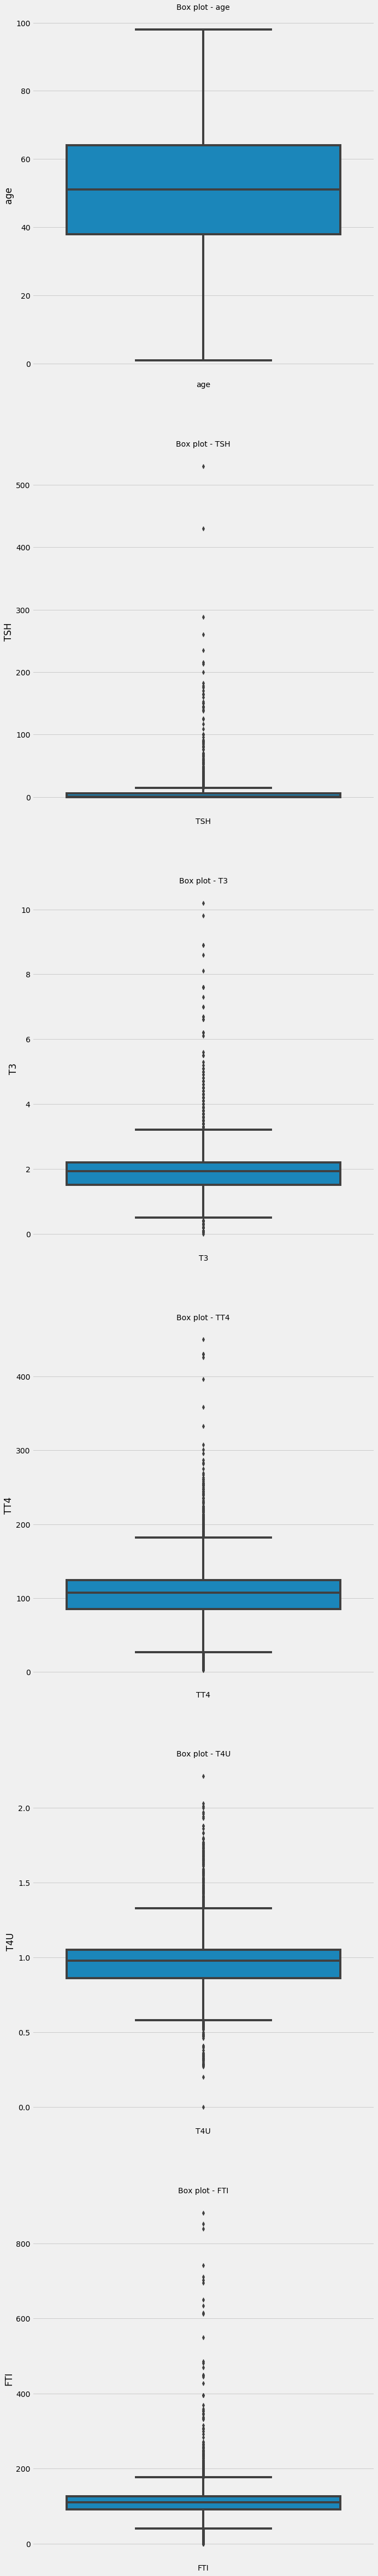

In [19]:
# The plotting is for non binary columns
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sb.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=14)
        ax[i].set_xlabel(column_name, fontsize=14)
    
    plt.show()
    
    #Execute the function
outlier_columns =['age','TSH','T3','TT4','T4U','FTI']
plt.style.use('fivethirtyeight')
plot_boxplots(df,outlier_columns)

> Outliers have been noted in all the hormonal mesurements columns. i.e, TSH, T3, TT4, T4U and FTI. OUtliers will not be dropped as futther reaserch is needed to asertain whether the measurements were incorrect pr whether it was a calibration error. 

## 3.2 **EXPLORATORY DATA ANALYSIS**

### **Univariate Analysis**

### Measures of Central Tendencies

FInding the mean, mode and median of the dataset

In [27]:
# finding the arithmetic mean for the variables
# 
df.mean()

age     51.112538
TSH      5.809320
T3       1.933666
TT4    108.706922
T4U      0.977559
FTI    115.489080
dtype: float64

In [29]:
# finding the mode for the dataset
#
df.mode().T

,0
status,negative
age,51.1125
sex,F
TSH_measured,y
TSH,0
T3_measured,y
T3,1.93367
TT4_measured,y
TT4,108.707
T4U_measured,y


In [30]:
# TO GET THE MEDIAN OF THE Dataset
# 
df.median().T

age     51.112538
TSH      1.000000
T3       1.933666
TT4    107.000000
T4U      0.977559
FTI    110.000000
dtype: float64

In [20]:
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object

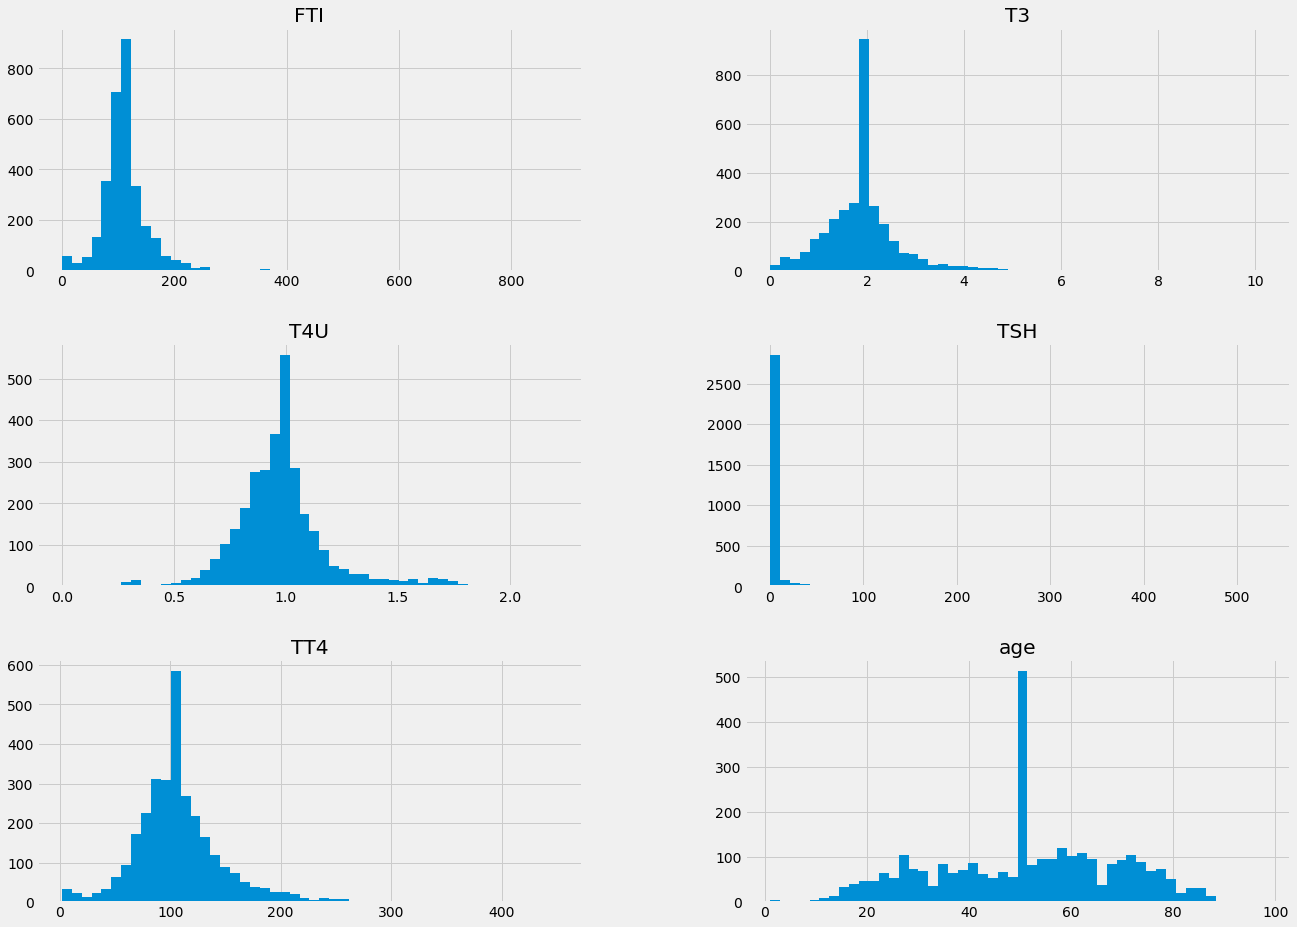

In [26]:
# To visualise the distribition of the columns
#Distribution plot
# 
# df_1 = df.drop(['on_thyroxine', 'query_on_thyroxine', 
#            'on_antithyroid_medication', 'thyroid_surgery',
#            'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 
#            'sick', 'tumor', 'lithium', 'goitre'], axis = 1, inplace = True)

# df.head()
df.hist(bins=50,figsize=(20,15))
plt.show()


> T4U has an almost symmetrical shape. The mode for the the variable is one

In [0]:
# to preview dataset
# 
df.head()

#### **AGE**

In [32]:
df.age.nunique()
# There are 92 unique values 
df.age.unique()

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.11253776, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

In [33]:
# description of the variable
# 
df['age'].describe()

count    3086.000000
mean       51.112538
std        17.854431
min         1.000000
25%        38.000000
50%        51.112538
75%        64.000000
max        98.000000
Name: age, dtype: float64

In [34]:
# maximum  and minimum  age 
# 
print("The maximum value of the Age variable is: ", df['age'].max())
print("The minimum value of the Age variable is:", df['age'].min())

The maximum value of the Age variable is:  98.0
The minimum value of the Age variable is: 1.0


<function matplotlib.pyplot.show>

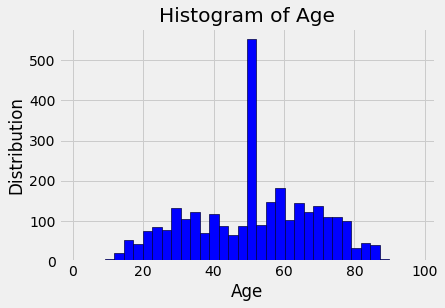

In [35]:
# visualizing the distribution of age 

# matplotlib histogram
plt.hist(df['age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sb.distplot(df['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show

# age is almost normally distributed

#### **SEX**

In [36]:
df.sex.nunique()
# there are 2 unique values 

2

In [37]:
df.head()

,status,age,sex,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


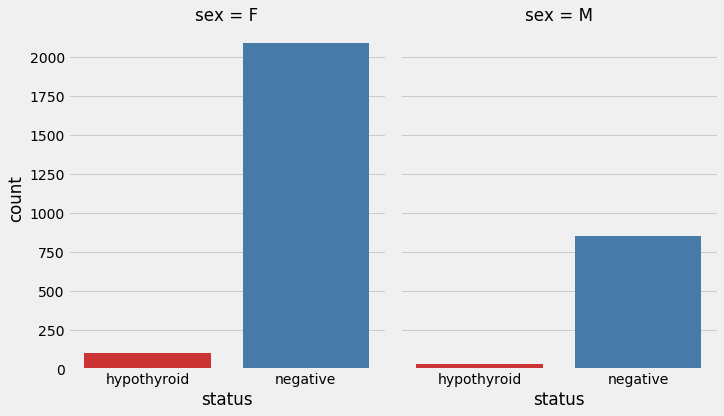

In [38]:
# Plotting bar charts
#
sb.catplot("status", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

> From the above visualization, we can conclude the following:



1.   The data is very imbalanced. There are more negative for hypothyroid data than there is for those who tested positive for hypothroid.
2.   More females tested positive for hypothyroid than males. 



### **BIVARIATE ANALYSIS**

Status Vs Age

To check the relationship between the status and age

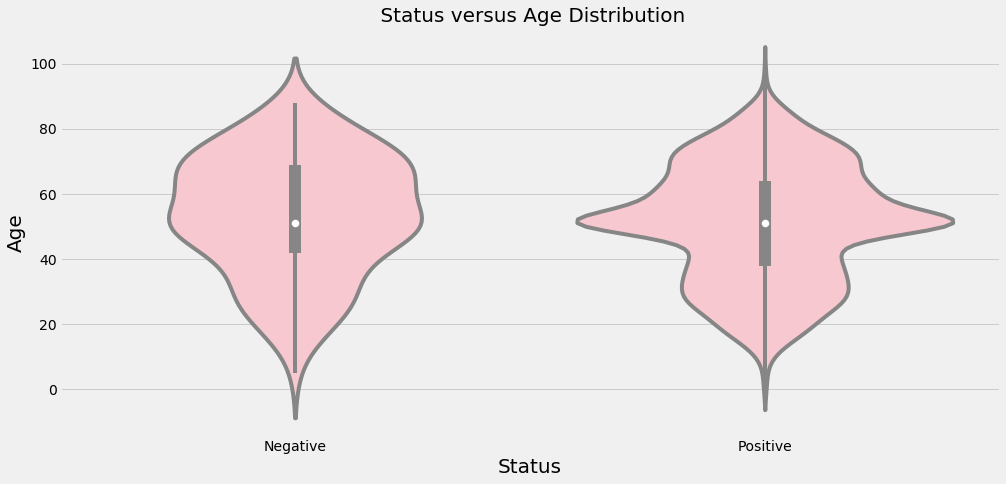

In [39]:
#Violin plot showing distribution of patients with hypothroid versus those without by age
plt.figure(figsize = (15,7))
sb.violinplot(x=df['status'], y=df['age'], color='pink')
plt.xticks([0,1], ['Negative',  'Positive'])
plt.ylabel('Age',fontsize = 20)
plt.xlabel('Status',fontsize = 20)
plt.title(' Status versus Age Distribution',fontsize = 20)
plt.show()

> From the violin plots above, we can conclude that hypothroid is affects all ages but it is more prevalent at the age of between 40 to 65. This could be beacuse most patients do not show the signs and symptoms when they are younger, and start showing when they turn 40 and above.

T3 vs TT4 Hormones

These two columns are both numerical. We will chek for the correlation between the columns and visualize using a scatterplot


In [40]:
# correlation between the two columns
# 
corr_1 = df[['T3', 'TT4']].corr()
corr_1

,T3,TT4
T3,1.000000,0.533845
TT4,0.533845,1.000000


Text(6.8700000000000045, 0.5, 'TT4')

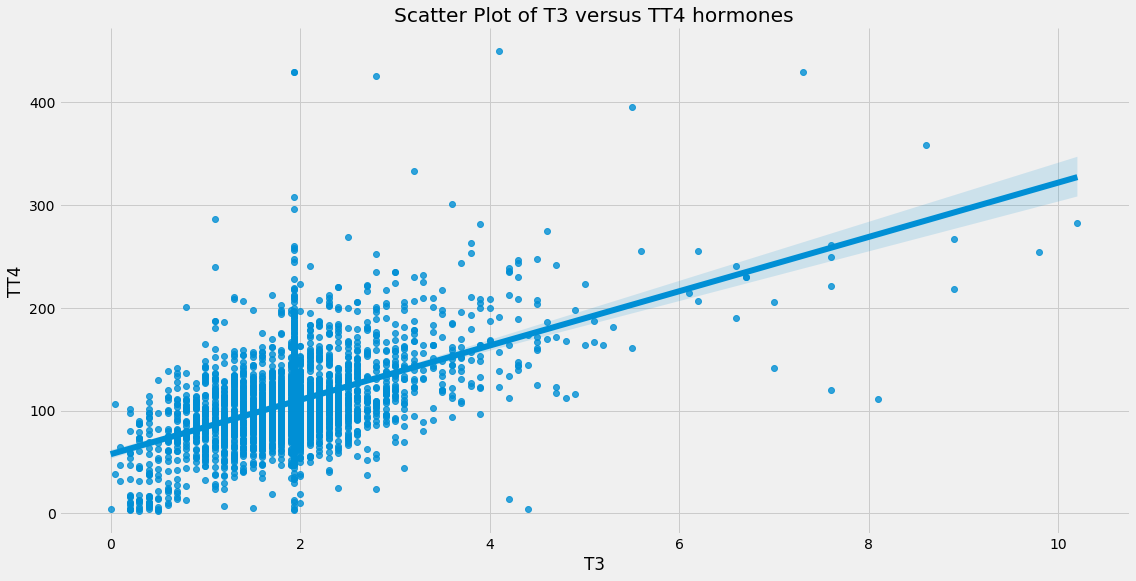

In [41]:
# Scatterplot of T3 versus TT4 hormones
sb.lmplot('T3', 'TT4',data=df,fit_reg=True,size=8,aspect =2)
# Set title
plt.title('Scatter Plot of T3 versus TT4 hormones')
# Set x-axis label
plt.xlabel('T3')
# Set y-axis label
plt.ylabel('TT4')

> So from the above scatterplot, it is evident that there is a positive correlation between the 2 hormones. 
The relationship is linear, i.e with every increase in one variable, there is an increase in the other. 

TT4 vs Status

> To see how the hormone levels affect the status of hypothyroid. We will use violin plots for this. 

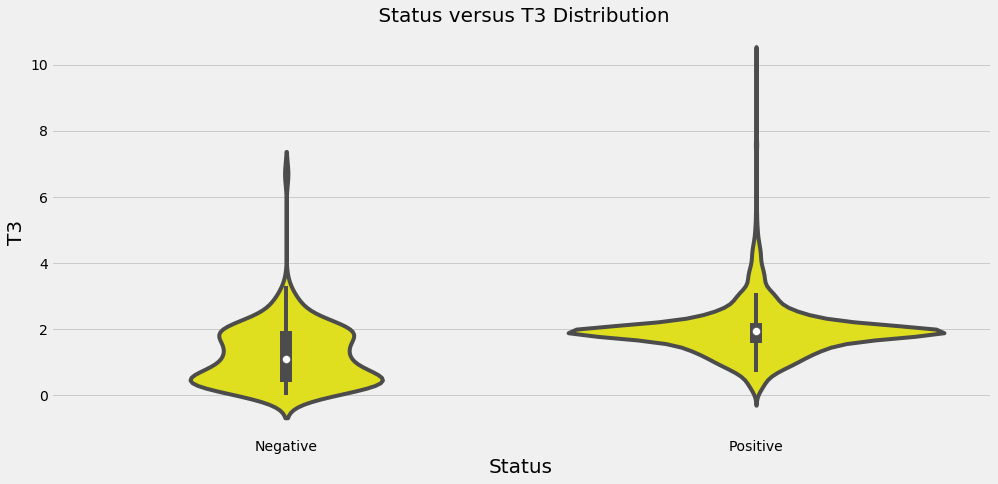

In [55]:
# violin plots of TT4 vs Status
# 
plt.figure(figsize = (15,7))
sb.violinplot(x=df['status'], y=df['T3'], color='yellow')
plt.xticks([0,1], ['Negative',  'Positive'])
plt.ylabel('T3',fontsize = 20) #labellling the y axis
plt.xlabel('Status',fontsize = 20) #labeling the x axis
plt.title(' Status versus T3 Distribution',fontsize = 20) #title of the violin plots
plt.show()

>  Patients with high levels of T3 hormone are at a higher risk of hypothyrodism. 

### **MULTIVARIATE ANALYSIS**

In [56]:
# checking the correlation of the variables
corr = df[['status', 'age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI']].corr()
corr 

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
age,1.000000,0.000451,-0.019781,-0.059541,-0.012432,0.043156,-0.087005,-0.157715,0.063078,-0.063738,-0.021559,-0.036387,-0.007352,-0.265743,-0.086317,-0.188786,0.017737
on_thyroxine,0.000451,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,-0.005257,0.023279,0.217276,0.071209,0.113350
query_on_thyroxine,-0.019781,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.014676,-0.015133,-0.020294,-0.034741,-0.004659
on_antithyroid_medication,-0.059541,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-0.001045,0.065626,-0.002745,0.026479,-0.017797
thyroid_surgery,-0.012432,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,0.012167,-0.007012,-0.016127,0.026078,-0.026105
query_hypothyroid,0.043156,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,0.066911,-0.038984,-0.010955,0.044393,-0.046271
query_hyperthyroid,-0.087005,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-0.022910,0.169325,0.131093,0.070024,0.063286
pregnant,-0.157715,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,-0.012415,0.201960,0.171237,0.323329,-0.005415
sick,0.063078,-0.063480,-0.024267,-0.021160,-0.033475,-0.051720,-0.051720,-0.025581,1.000000,-0.020644,-0.004588,-0.032279,-0.006218,-0.103268,-0.042154,-0.047710,-0.023498
tumor,-0.063738,-0.022658,0.049524,-0.013461,-0.021294,-0.032900,-0.032900,0.004308,-0.020644,1.000000,-0.002918,-0.020534,-0.019244,0.026472,-0.014707,0.024743,-0.026980


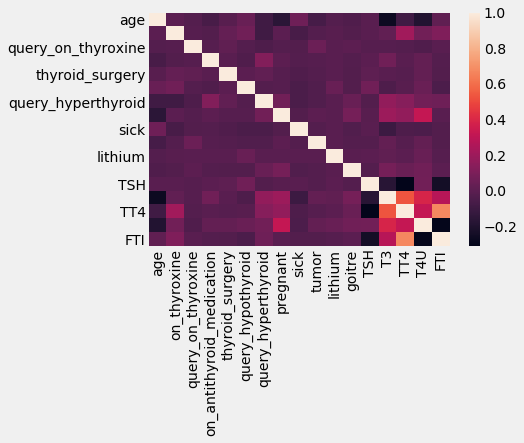

In [57]:
# getting a heatmap of the correlation
# 
sb.heatmap(df.corr())  

White means very high positive correlation. The highest correlation is 1. Dark blue means a very low negative correlation. 

> T4U and FTI have a very high correlation of around 0.8. 

> T3 and TT4 hormone have a relatively high correlation of around 0.6

When variables are highly correlated, it means that the variables have a relationship and that they are not independent. 


# **MODELLING**

In [0]:
# importing all the necessary libaries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings

### **BASELINE MODEL**

In [62]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [0]:
# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [60]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9854368932038835


The model accuracy for the baseline model is .988.

### **Random Forest Approach**

In [61]:
# Random forest approach
# Import the model
from sklearn.ensemble import RandomForestClassifier


# Instantiating the model
#
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train, y_train)

# Making predictions
#
y_pred = RFC.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


The accuracy score is: 0.9902912621359223 and the f1 score is 0.8695652173913043


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       593
           1       0.95      0.80      0.87        25

    accuracy                           0.99       618
   macro avg       0.97      0.90      0.93       618
weighted avg       0.99      0.99      0.99       618



array([[592,   1],
       [  5,  20]])

The F1 score for the model is 0.8695, which is an indicator a good fit. We will find the important features of the model and remodel. 
We will then check the model accuracy. 

Since the data is very imbalanced, we will employ the AUC approach to check for model accuracy.

In [63]:
# Checking for the most important features 
# create a df of the features and their importance
# in ascending order
#
important_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(RFC.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_df

,importance
feature,
FTI,0.3192
TT4,0.2357
TSH,0.2278
T3,0.0773
T4U,0.0434
age,0.0389
on_thyroxine,0.0073
on_antithyroid_medication,0.0072
query_hypothyroid,0.0069


From the given df, it is evident that the FTI column is the most important feature followed by the TT4 feature.

We could visualize the output above in a barchart. 

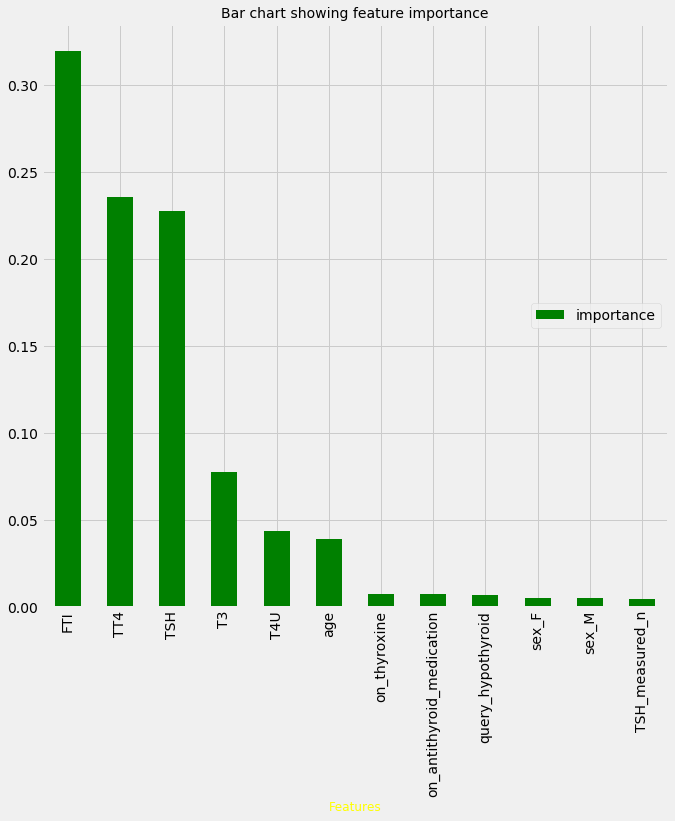

In [65]:
# Creating a bar chart of feature importance in descending order
#
important_df = important_df[:12].sort_values(by = 'importance', ascending = False)
important_df.plot(kind = 'bar', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'black', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'yellow')
plt.show()

As shown above, the most important features are:
FTI, TSH, TT4, T3, T4U and Age. 

####  *Remodeling using just the Important features*

In [66]:
# Selecting the independent variables and the target variable
#
X = X[['age', 'sex_F', 'sex_M', 'TSH_measured_y', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured_n']]
y = np.where(df.status == 'hypothyroid', 1, 0)


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# instanting the model
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train, y_train)

# Making predictions
#
y_pred = RFC.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)



The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

> COnfusion Matrix: THe model has 885 true positivess and 35 true negatives.There are only 6 misclassified values indicating that the model is a good predictor. 


> The F1 score is now 0.9210 which means that the model accuracy has improved.

#### **PRECISION-RECALL MEASURE OF ACCURACY**

**AREA UNDER THE CURVE**

> Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

> Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Random Forest: f1=0.921 auc=0.935


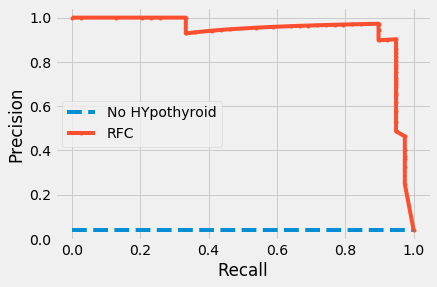

In [70]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = RFC.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_hypo = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_hypo, no_hypo], linestyle='--', label='No HYpothyroid')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RFC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

> The model accuracy using the AUC is 93.5% 

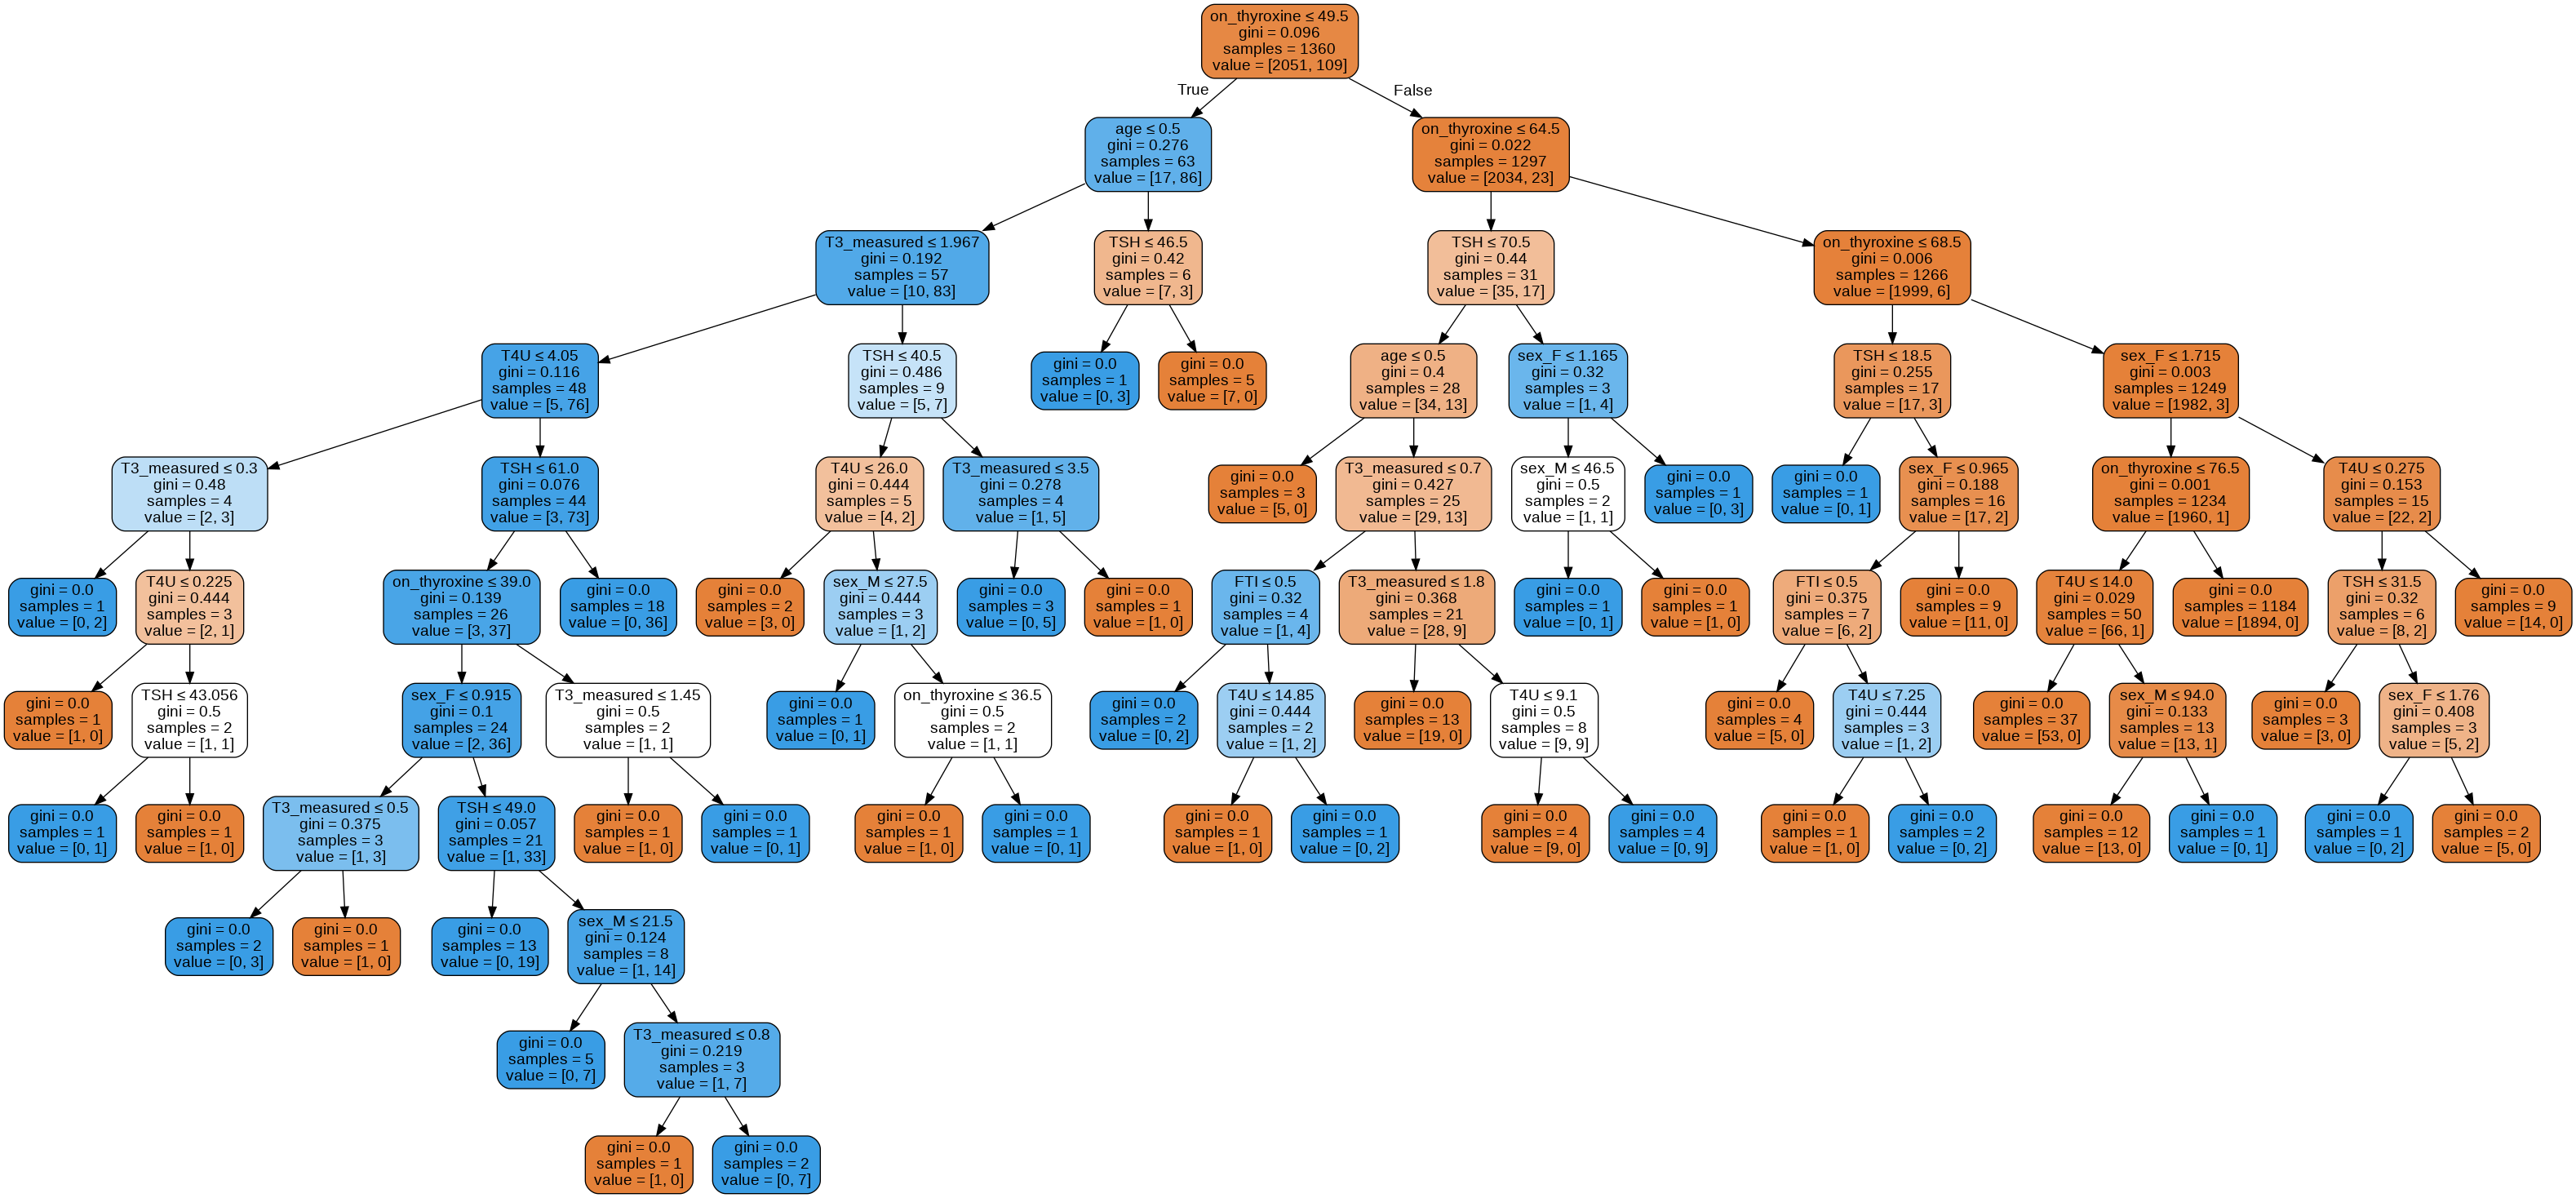

In [81]:
## Check the performance of sample tree output
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
x_features = ['TSH', 'FTI', 'T3', 'age', 'T4U', 'T3_measured', 'sex_M', 'sex_F', 'on_thyroxine', 'age']
dot_data = StringIO()
# pick a specific tree from the forest
tree = RFC.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#### **ADABOOST APPROACH**

In [71]:
# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ABC = AdaBoostClassifier(random_state = 0)
ABC.fit(X_train, y_train)

# Making predictions
#
y_pred = ABC.predict(X_test)

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_1} and the f1 score is {f1_1}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

In [72]:
# df to show the most important features in the model
# in descending order
imp_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(ABC.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
imp_df

,importance
feature,
FTI,0.22
age,0.16
TSH,0.16
T4U,0.12
T3,0.12
TT4,0.12
on_antithyroid_medication,0.04
query_hypothyroid,0.02
thyroid_surgery,0.02


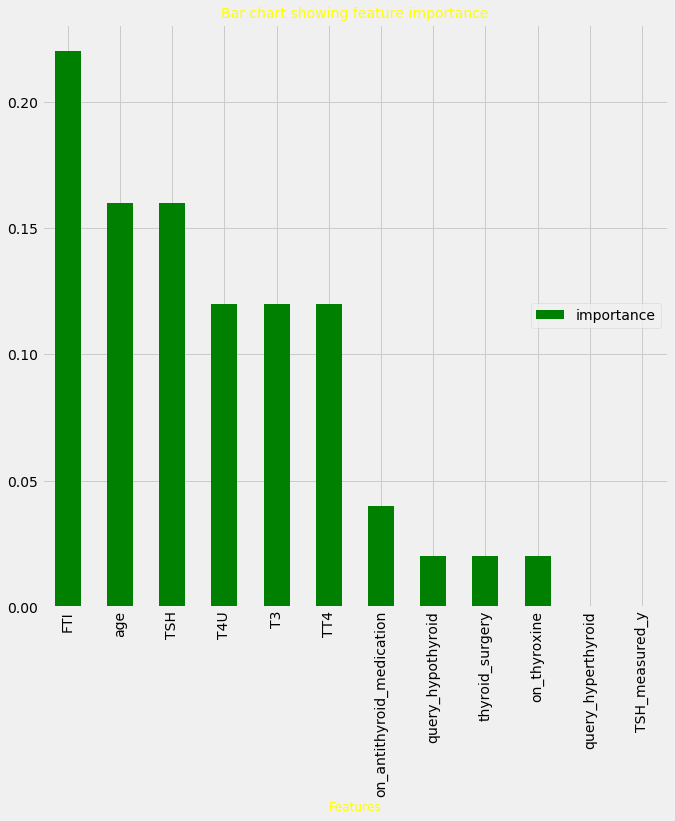

In [73]:
# VISUALIIZNG THE OUTPUT ABOVE

imp_df = imp_df[:12].sort_values(by = 'importance', ascending = False)
imp_df.plot(kind = 'bar', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'yellow', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'yellow')
plt.show()

In [74]:
# remodelling using the most important features
# Selecting the independent variables and the target variable
#
X = X[['age', 'on_thyroxine', 'thyroid_surgery', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]

y = np.where(df.status == 'hypothyroid', 1, 0)


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# instanting the model
ABC = AdaBoostClassifier(random_state = 0)
ABC.fit(X_train, y_train)
# Making predictions
#
y_pred = ABC.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)



The accuracy score is: 0.990280777537797 and the f1 score is 0.8831168831168831


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.89      0.87      0.88        39

    accuracy                           0.99       926
   macro avg       0.94      0.93      0.94       926
weighted avg       0.99      0.99      0.99       926



array([[883,   4],
       [  5,  34]])

Adaboost: f1=0.883 auc=0.927


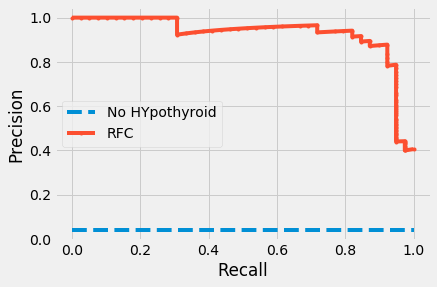

In [76]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = ABC.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

# summarize scores
print('Adaboost: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_hypo = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_hypo, no_hypo], linestyle='--', label='No HYpothyroid')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RFC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### **SUPPORT VECTOR MACHINE APPROACH**

From the above 2 models, it is clear that the two most important features are TSH and FTI. We will use these two features in this approach to create the algorithmn. 

In [77]:
# getting the values for x and y
X = df[['FTI', 'TSH']].values
y = np.where(df.status == 'hypothyroid', 1, 0)

# laoding and creating a list of models 
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']

def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9838012958963283 and the f1 score is: 0.7692307692307693
The accuracy score of Linear     is: 0.9859611231101512 and the f1 score is: 0.8169014084507042
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


The linear SVM is the most accurate with an F1 score of 0.81. 

# **FOLLOW UP QUESTIONS**

#### 